In [1]:
# Imports 
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
# Import own helpers
from vesuvius.data.vesuvius_train import VesuviusTrainDataset
from vesuvius.transforms.volume import Compose, NormalizeVolume, CenterCrop3D, RandomCrop3D

In [3]:
# Root folder path
ROOT = Path("~/vesuvius-scroll-detection/data/raw/vesuvius").expanduser()

print("ROOT:", ROOT)

ROOT: /Users/chamu/vesuvius-scroll-detection/data/raw/vesuvius


In [5]:
# Load one raw sample
ds_raw = VesuviusTrainDataset(ROOT, transform=None)

img, mask, sid = ds_raw[0]

print("sid:", sid)

# 1: #channels (=1 for greyscale), D: depth, H: heigth, W: width
print("img shape:", img.shape, "dtype:", img.dtype) # 3D -> [1, D, H, W]
print("mask shape:", mask.shape, "dtype:", mask.dtype) # 3D -> [1, D, H, W]

sid: 2290837
img shape: torch.Size([1, 320, 320, 320]) dtype: torch.float32
mask shape: torch.Size([1, 320, 320, 320]) dtype: torch.float32


In [6]:
# Apply transform directly (unit-test style)
tfm = Compose([
    CenterCrop3D((64, 256, 256)),
    NormalizeVolume(),
])

out = tfm({"image": img, "mask": mask})
img_t, mask_t = out["image"], out["mask"]

print("after:", img_t.shape, mask_t.shape)
print("mean/std:", img_t.mean().item(), img_t.std().item())

after: torch.Size([1, 64, 256, 256]) torch.Size([1, 64, 256, 256])
mean/std: 7.271301001310349e-07 0.9999999403953552


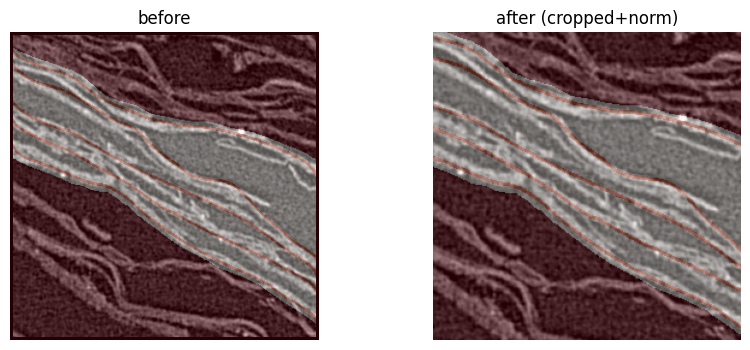

In [7]:
# Visualise before and after (same slice index)
z0 = img.shape[1] // 2
z1 = img_t.shape[1] // 2

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(img[0, z0], cmap="gray")
plt.imshow(mask[0, z0], alpha=0.35, cmap="Reds")
plt.title("before")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(img_t[0, z1], cmap="gray")
plt.imshow(mask_t[0, z1], alpha=0.35, cmap="Reds")
plt.title("after (cropped+norm)")
plt.axis("off")

plt.show()

In [8]:
# Random crop (should change location)
tfm_rand = Compose([RandomCrop3D((64, 256, 256))])

out1 = tfm_rand({"image": img, "mask": mask})
out2 = tfm_rand({"image": img, "mask": mask})

print(out1["image"].shape, out2["image"].shape)
print("same crop?", (out1["image"] == out2["image"]).all().item())

torch.Size([1, 64, 256, 256]) torch.Size([1, 64, 256, 256])
same crop? False
